In [69]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [70]:
from sklearn import linear_model
from sklearn.datasets import load_iris


In [71]:
iris = load_iris()
X = iris.data[:,:2]
Y = iris.target


In [72]:
# def flower(num):
#     if num == 0:
#         return 'Setosa'
#     elif num == 1:
#         return 'Versicolour'
#     else:
#         return 'Virginica'
# iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])
# iris_target = DataFrame(Y,columns=['Species'])
# iris_target['Species'] =  iris_target['Species'].apply(flower)
# iris = pd.concat([iris_data,iris_target],axis=1)
# iris.head()


In [73]:
# sns.pairplot(iris,hue='Species',size=3)


In [74]:
# sns.factorplot('Petal Length',data=iris,hue='Species',size=10)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [76]:
def plot_model(model,X,Y):
    h = .02  # step size in the mesh


    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    plt.subplot(2, 2, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("1")

    plt.show()

In [77]:
logreg = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)
X,Y = X_train, Y_train

In [78]:
logreg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
from sklearn import metrics
Y_pred = logreg.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)


0.7833333333333333

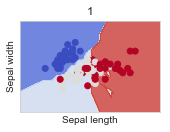

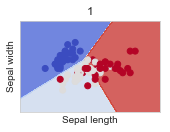

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)
plot_model(knn,X,Y)
plot_model(logreg,X,Y)

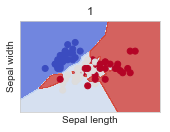

In [81]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
metrics.accuracy_score(Y_test,Y_pred)
plot_model(knn,X,Y)


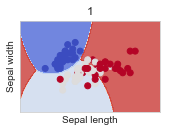

In [82]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test, predicted)
plot_model(model,X,Y)

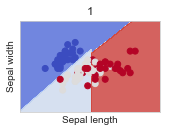

In [83]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test, predicted)
plot_model(model,X,Y)

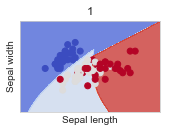

In [84]:
model = SVC(kernel='poly')
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test, predicted)
plot_model(model,X,Y)

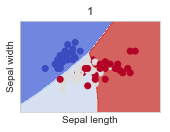

In [85]:
model = SVC(kernel='rbf')
model.fit(X_train,Y_train)
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test, predicted)
plot_model(model,X,Y)